Задание 
1. Использовать метод К-средних и метод DBSCAN на самостоятельно сгенерированной выборке с количество кластеров не менее 4. Для увелечения числа клкстеров при генерации можно задать количество центров в функции make_blobs через параметр centres. 
2. Использовать эти же два метода на датасете Mall_Customers.
3. Для каждого метода построить график.

# Использование метода К-средних на самостоятельно сгенерированной выборке 

Импортируем необходимые библиотеки: 

In [ ]:
import numpy as np
import pandas as pd
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

Воспользуемся библиотекой sklearn, чтобы сгенерировать "игрушечные" данные. Мы сгенерируем 400 объектов, имеющих 2 признака и разделенные на 5 кластеров. Кроме того, мы зададим значение random_state = 4 (цифра может быть любая), для повторяемости результатов. (Функция make_blobs() генерирует данные из изотропных гауссовских распределений. В качестве аргумента можно указать количество функций, количество центров и стандартное отклонение каждого кластера.)

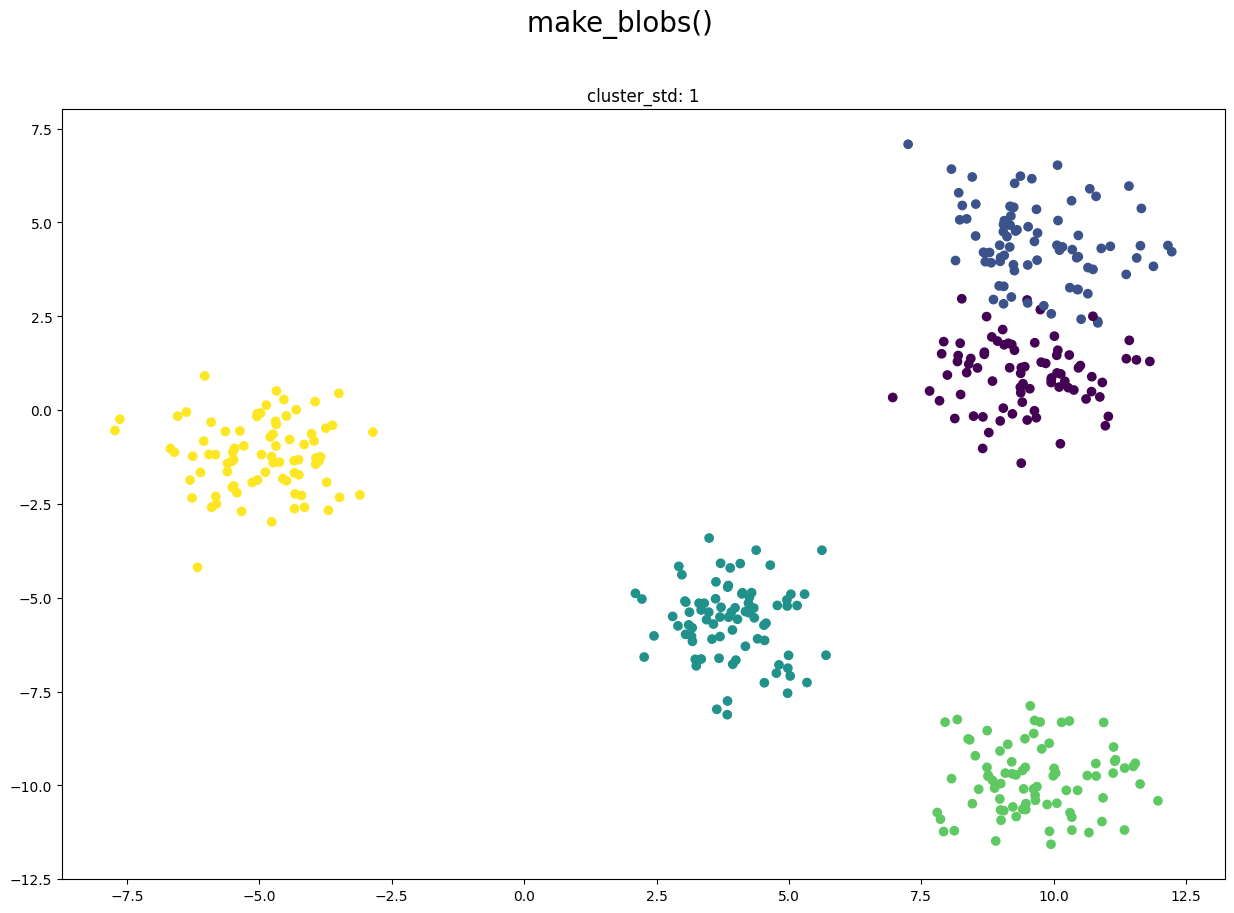

In [ ]:
from sklearn.datasets import make_blobs
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
x, label = dt.make_blobs(n_samples=400,n_features=2,
                             centers=5,
                             cluster_std=1,
                             random_state=4)
    
my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=label,
                                  vmin=min(label),
                                  vmax=max(label))
plt.title('cluster_std: '+str(1))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_blobs() ',fontsize=20)
plt.show()

Воспользуемся библиотечным алгоритмом k-средних из библиотеки sklearn. Для класса KMeans нам интересны следующие входные параметры:
* n_clusters - количество кластеров,
* init - способ инициализации центроидов (по умолчанию это значение 'k-means++', что нас устраивает),
* n_init (по умолчанию=10) - этот параметр означает, что k-means будет инициализироваться 10 раз, и в конечном итоге будет выбрано то разбиение, которое имеет лучшее значение критерия k-means
* random_state - нужен для повторяемости результатов. Если установить для этого параметра любое числовое значение (по умолчанию он None), то мы будем получать одинаковый результат при разных запусках, на разных ноутбуках и т.д.

Так как для реальных данных мы не знаем количество кластеров на которые оптимально разбить датасет, давайте для начала разобьем его на два кластера

In [ ]:
from sklearn.cluster import KMeans
kmeansModel = KMeans(n_clusters=2)

Обучим модель

In [ ]:
kmeansModel.fit(x)

KMeans(n_clusters=2)

После обучения мы можем получить метки кластеров, взяв атрибут класса KMeans под названием labels_

In [ ]:
labels = kmeansModel.labels_

In [ ]:
print(labels)

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


Мы получили массив с метками классов соответствующих объектов (как мы и просили, классов у нас два: 0 и 1)

Визуализируем полученные результаты, добавив в функцию scatter массив с метками классов

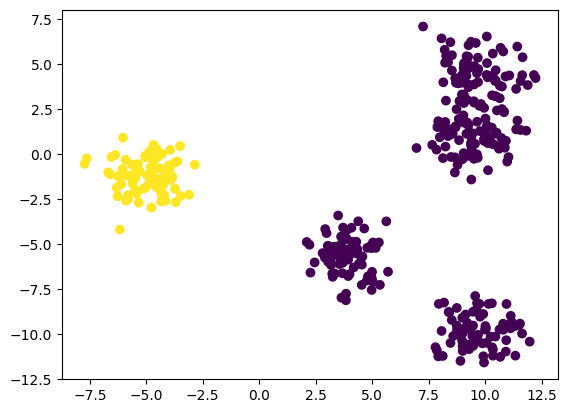

In [ ]:
plt.scatter(x[:,0], 
            x[:,1], 
            c=labels, 
            vmin=min(labels), 
            vmax=max(labels))

Деление на 2 кластера было пробным. Попробуем подобрать более удачное количество кластеров с помощью метода локтя.

Для каждого k будем считать значение критерия k-means: $$L^{(k)}(C)=\sum\limits_{j=1}^k\sum\limits_{x_i \in C_j}{||x_i-\mu_j||^2}$$


Вычислим значение критерия k-means для разных k и сохраним все эти значения в списке criteries. Сначала этот список пустой. Затем в цикле, где к меняется от 2 до 10, создаем модель для кластестеров с числом равным текущему значению k, обучаем ее, и добавляем вычисленный критерий (его берем как атрибут модели с именем inertia_) в наш список критериев

In [ ]:
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(x)
  criteries.append(kmeansModel.inertia_)

In [ ]:
print(criteries)

[12570.178296103497, 3258.353976614023, 1226.8028320736612, 727.0569681746908, 655.0945846753691, 600.1466827773054, 546.3374108901317, 493.6072325125299]


Для метода локтя мы должны построить график для полученных значений. По оси X у нас буду значения k, по оси у - вычисленные значения критерия

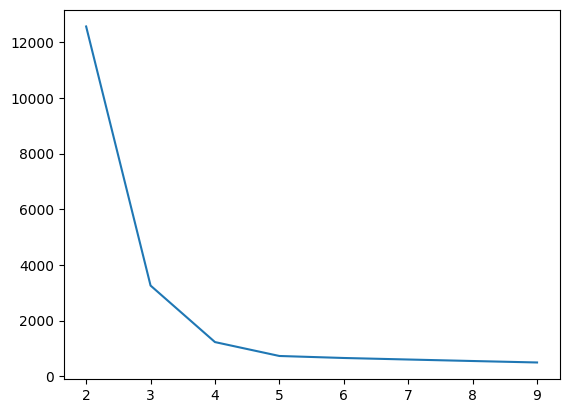

In [ ]:
plt.plot(range(2,10), criteries)

Как видно из графика, оптимальное количество кластеров в данном случае - 4

Применим метод для 4 кластеров и посмотрим результат

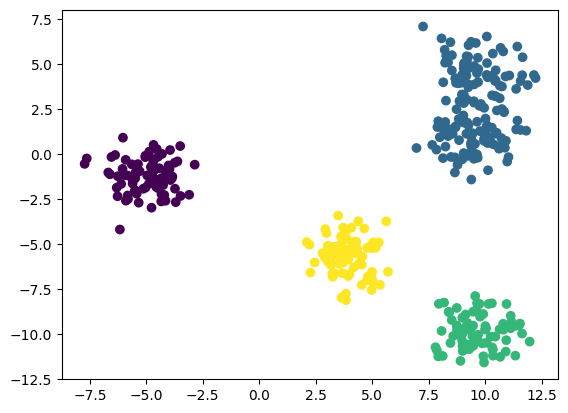

In [ ]:
kmeansModel=KMeans(n_clusters=4, random_state=4)
kmeansModel.fit(x)
labels = kmeansModel.labels_
plt.scatter(x[:,0], x[:,1], c=labels)

-----

# Использование метода DBSCAN на самостоятельно сгенерированной выборке 

Значительное влияние на работу алгоритма DBSCAN оказывают два его входных параметра: eps -радиус окрестности (это максимальное расстояние на котором две точки считаются соседями и могут быть отнесены к одному кластеру) и min_samples - минимальное количество точек, образующих кластер. Подбор этих параметров - важная часть настройки данного метода. Посмотрим это на примере небольшого набора "синтетических" данных

[ 0  1  2  3  2  1  3  0  0  0  3  2  3  2  1  0  3  3  3  0  3  3  1  3
 -1  1  3  0  2  1  2  1  3  3  1  1  2  0  3  1  1  3  1  1  2  3  0  2
  1  0  2  2  1  3  1  3  3  1  3  0  2  2  3  3  3  3  3  0  2  3  3  0
  0  3  2  3  3  0  3  0  3  3  3  2  1  3  0  0  1  0  1  3  0  3 -1  2
  3  0  0  2  3  0  1  3  0 -1  1  2  1  2  3  3  2  2  3  2  1  0  3  0
  3  2  1  2  0  3  2  3  0  3  3  1  3  3  3  3  3  0  1  1  3  0  1  0
  0  1  2  3  1  0  2  3  1  0  3  1  3  3  3  1  3  3  3  2  2  0  2  3
  0  1 -1  3  2  3  3  1  3  1  3  3  3  0  1  3  1  3  2  3  3  3  3  1
  2  3  0 -1  3  1  2  1  3  2  0  3  3  3  0  3  2  2  3  2  2  1  2  0
  3  0  3  3  1  3  3  0  2  0  3  3  0  3  0  3  3  0  3  3  0 -1  3  3
  3  0  0  1  1  0  1  1  3  0  3  3  2  2  1  0  3  2  3  0  0  1  3  3
  1  2  2  1  3  3  1  2  2  2  3  0  2  2  1  2  0  3  2  3  0  2  0  1
  0  3  3  2  3  0  3  3  3  3  0  1  2  0  2  2  3  1  1  1  1  3  3  3
  2  1  2  1  1  3  1  2  3  2  0  3  1  1  3  2  2

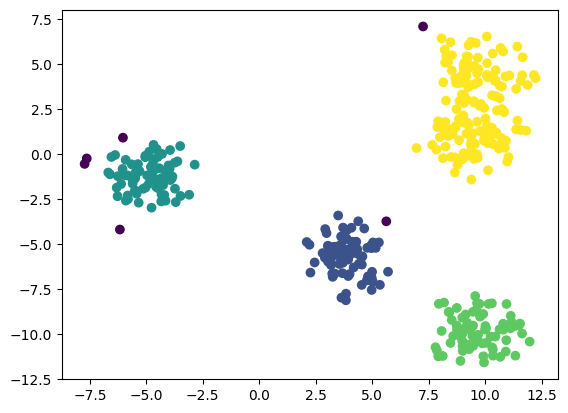

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1, min_samples=5).fit_predict(x)
print(clustering)
plt.scatter(x[:,0], x[:,1], c=clustering);

Можем заметить несколько точек со значением -1, что означает "шум".

[0 1 2 3 2 1 3 0 0 0 3 2 3 2 1 0 3 3 3 0 3 3 1 3 1 1 3 0 2 1 2 1 3 3 1 1 2
 0 3 1 1 3 1 1 2 3 0 2 1 0 2 2 1 3 1 3 3 1 3 0 2 2 3 3 3 3 3 0 2 3 3 0 0 3
 2 3 3 0 3 0 3 3 3 2 1 3 0 0 1 0 1 3 0 3 1 2 3 0 0 2 3 0 1 3 0 0 1 2 1 2 3
 3 2 2 3 2 1 0 3 0 3 2 1 2 0 3 2 3 0 3 3 1 3 3 3 3 3 0 1 1 3 0 1 0 0 1 2 3
 1 0 2 3 1 0 3 1 3 3 3 1 3 3 3 2 2 0 2 3 0 1 1 3 2 3 3 1 3 1 3 3 3 0 1 3 1
 3 2 3 3 3 3 1 2 3 0 1 3 1 2 1 3 2 0 3 3 3 0 3 2 2 3 2 2 1 2 0 3 0 3 3 1 3
 3 0 2 0 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 0 0 1 1 0 1 1 3 0 3 3 2 2 1 0 3 2 3
 0 0 1 3 3 1 2 2 1 3 3 1 2 2 2 3 0 2 2 1 2 0 3 2 3 0 2 0 1 0 3 3 2 3 0 3 3
 3 3 0 1 2 0 2 2 3 1 1 1 1 3 3 3 2 1 2 1 1 3 1 2 3 2 0 3 1 1 3 2 2 2 1 2 0
 2 3 3 1 3 3 3 3 3 3 3 0 2 0 0 2 0 2 3 3 0 2 3 0 1 0 0 2 3 1 0 0 3 0 1 3 3
 0 3 2 3 2 2 3 2 3 3 3 1 1 0 1 3 0 3 3 2 3 3 1 3 3 2 3 1 2 3]


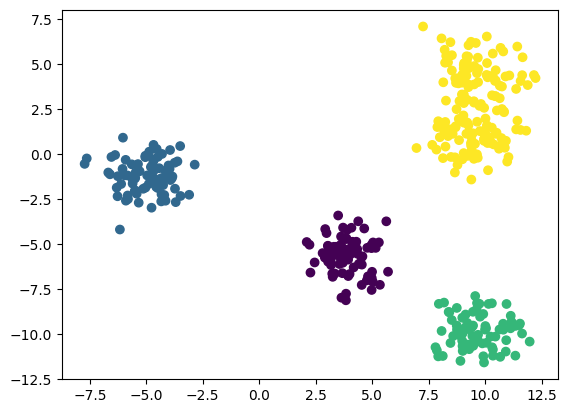

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1.75, min_samples=2).fit_predict(x)
print(clustering)
plt.scatter(x[:,0], x[:,1], c=clustering);

После того, как мы увеличили радиус окрестности, наши данные кластеризовались без аномальных выбросов. 

----

# Использование метода K-средних на заданном датасете 

In [ ]:
mall_data = pd.read_csv('Mall_Customers.csv')

In [ ]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
category = mall_data["Age"].unique()
category

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

Так как мы имеем дело с двумерным пространством, Вам нужно выбрать 2 признака (столбца) из представленных в датафрейме. Выделим наиболее значимые столбцы, это: age, annual income, spending score. 

In [ ]:
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values

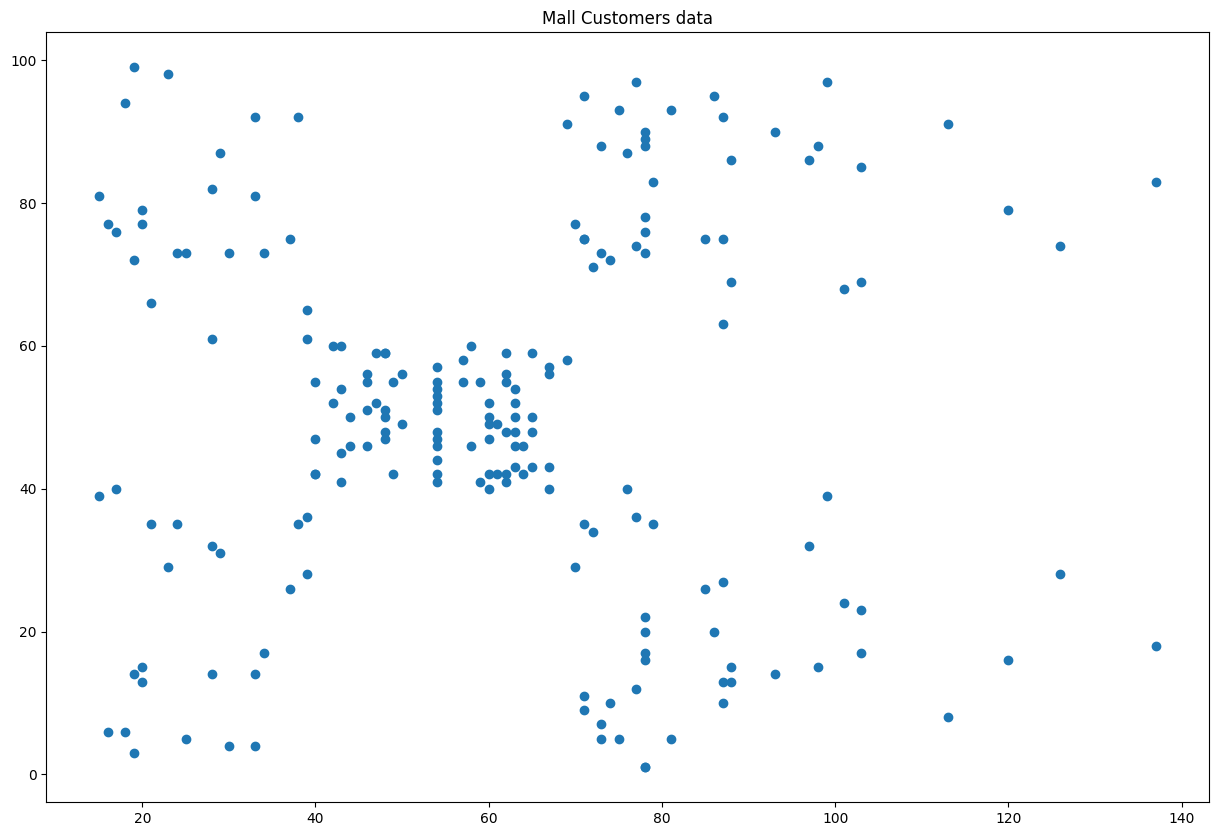

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
plot = plt.scatter(X[:,0], X[:,1])
plt.title('Mall Customers data')
plt.show()

In [ ]:
kmeansModel.fit(X)


KMeans(n_clusters=4, random_state=4)

In [ ]:
lb = kmeansModel.labels_
print(lb)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


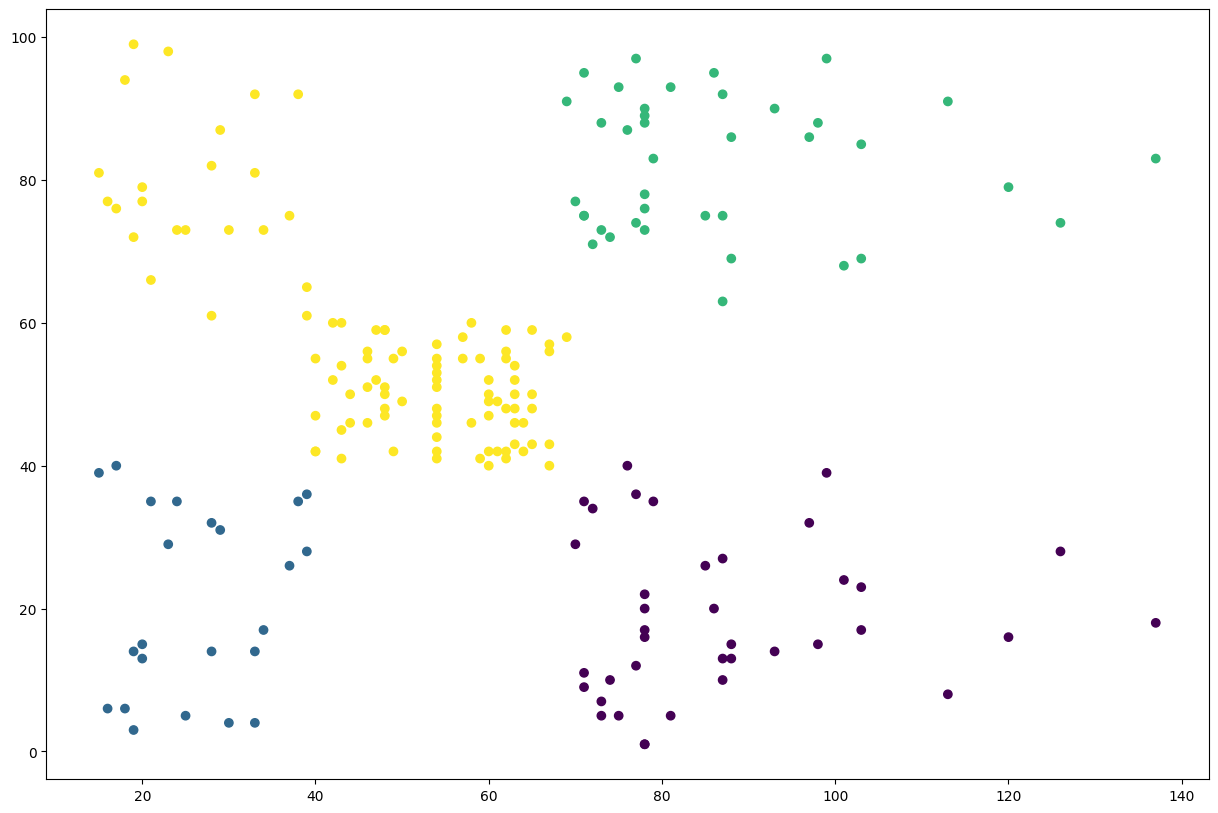

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
plt.scatter(X[:,0], 
            X[:,1], 
            c=lb, 
            vmin=min(lb), 
            vmax=max(lb))

In [ ]:
cr = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(X)
  cr.append(kmeansModel.inertia_)

In [ ]:
print(cr)

[181363.59595959593, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.814510710006, 30273.394312070042, 26086.451614668855, 21932.39204424098]


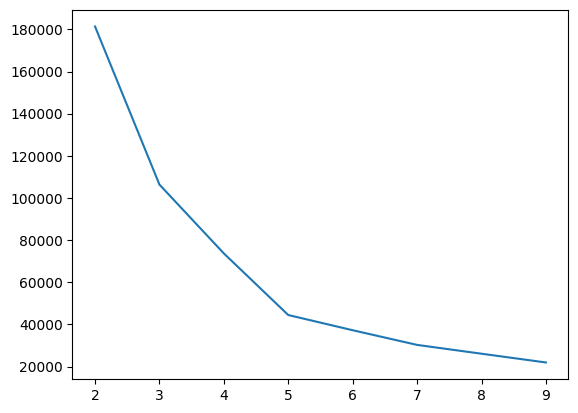

In [ ]:
plt.plot(range(2,10), cr)

Как видно из графика, оптимальное количество кластеров в данном случае - 5

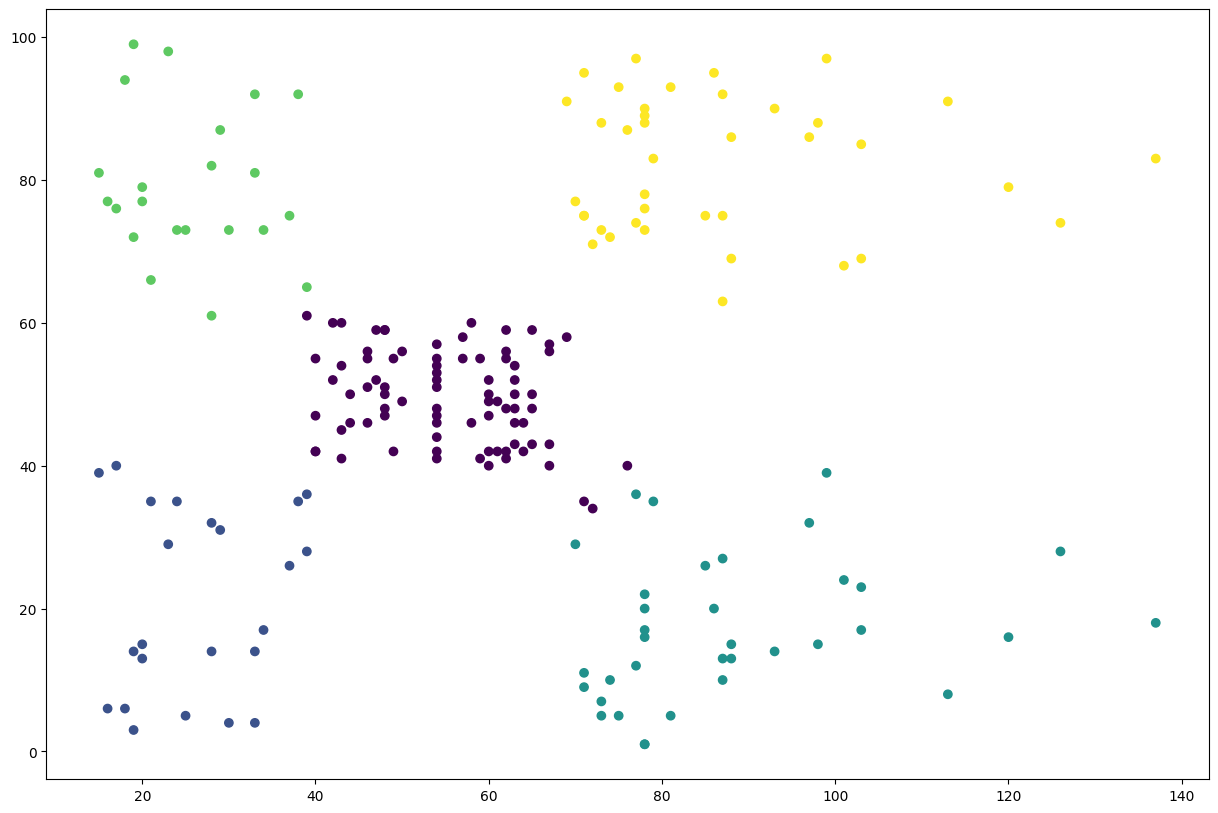

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
kmeansModel=KMeans(n_clusters=5, random_state=4)
kmeansModel.fit(X)
lb = kmeansModel.labels_
plt.scatter(X[:,0], X[:,1], c=lb)

---

# Использование DBSCAN на заданном датасете

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


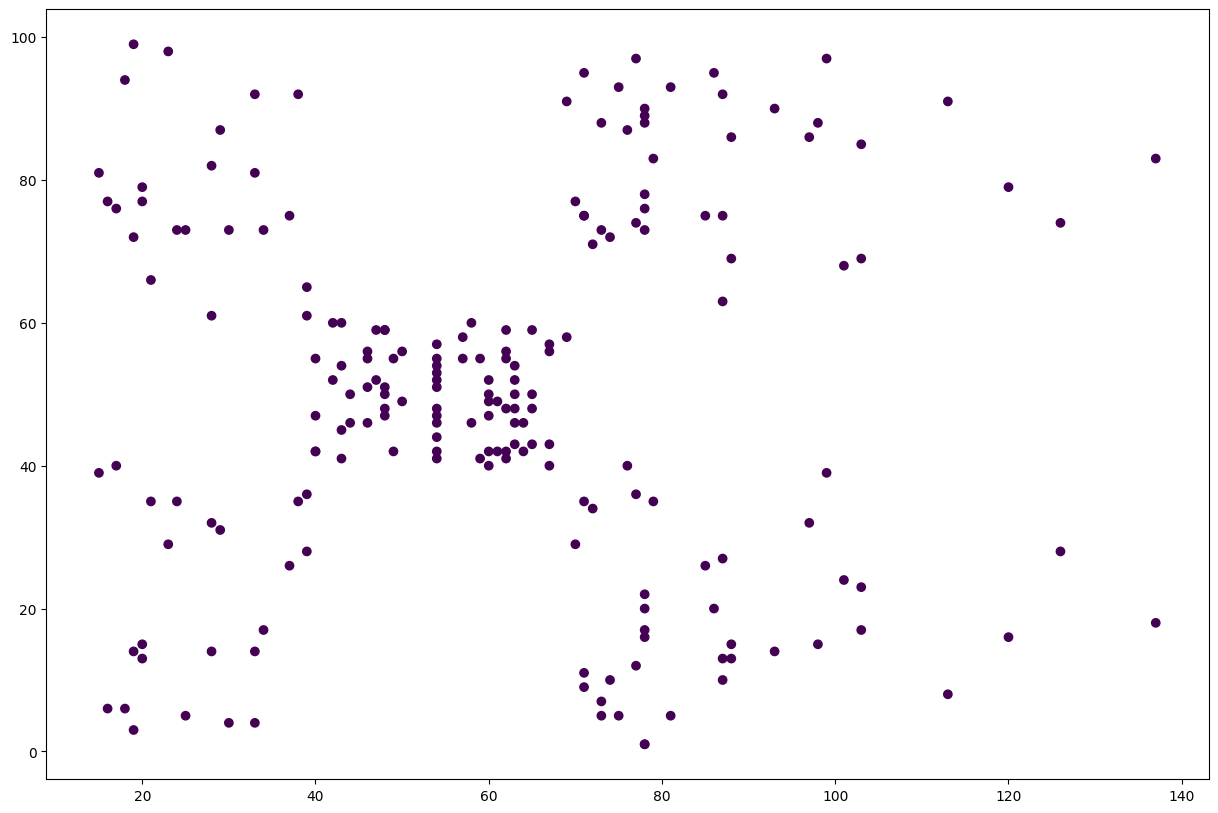

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
clust = DBSCAN(eps=1, min_samples=5).fit_predict(X)
print(clust)
plt.scatter(X[:,0], X[:,1], c=clust);

[-1  0  1  0 -1  0  1 -1  1  0  1 -1  1  0  1  0 -1  0 -1 -1 -1  0  1  0
  1  0  2  2  2  0  1  0  1  0 -1  0 -1  0  2  0  2 -1  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  2  3  2  3  4  3  4  3  2  3  4  3  4  3  4  3  4  3  2  3
  4  3  2  3  4  3  4  3  4  3  4  3  4  3  4  3  2  3  4  3  4  3  4  3
  4  3  4  3  4  3  4  3  4  3  4  3 -1  3  4  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


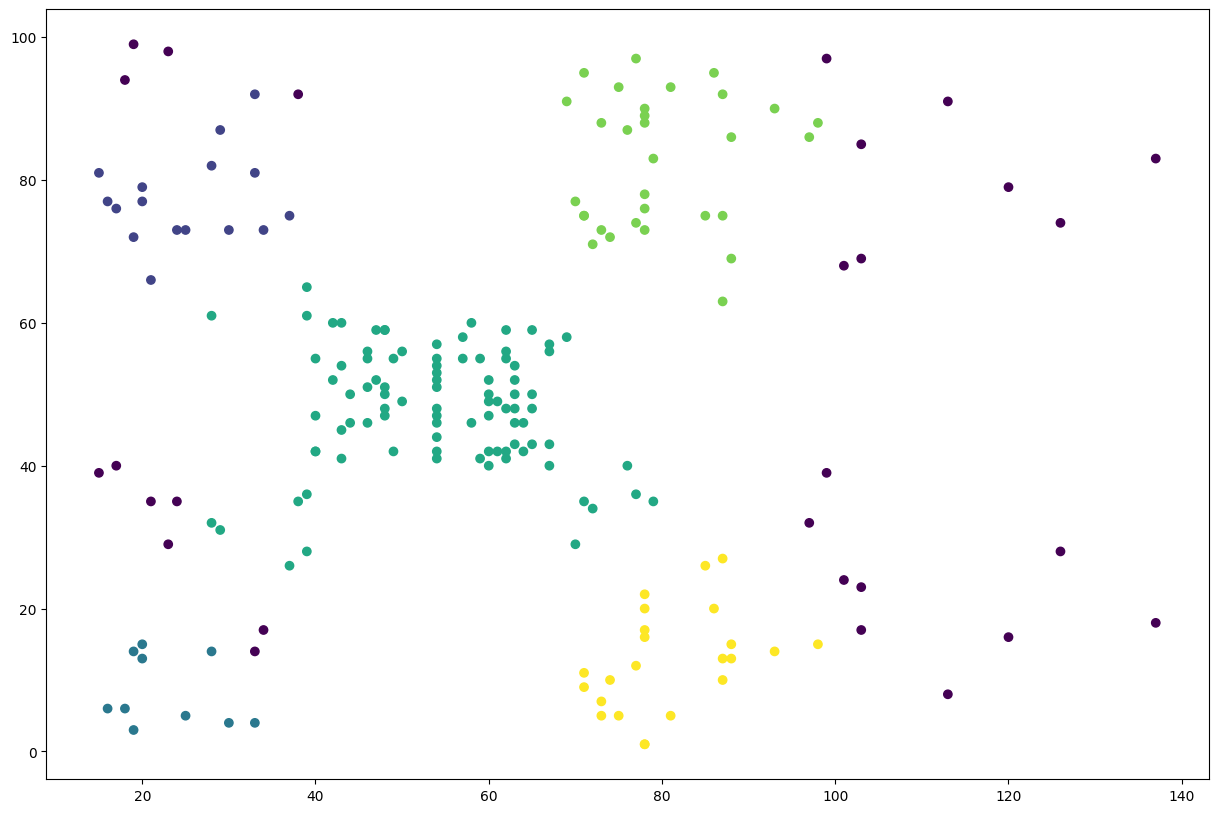

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
clustering = DBSCAN(eps=12, min_samples=10).fit_predict(X)
print(clustering)
plt.scatter(X[:,0], X[:,1], c=clustering);